# Problème de classification 1 - Déterminer quels employés peuvent démissionner
### Chargement de nos principaux enregistrements de base de données RH

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/hr_data.csv"
hr_df = pd.read_csv(file_name)


In [ ]:
# Afficher les 10 premières lignes de notre dataframe "hr_df"

display(hr_df.head(10))

# Afficher les 5 dernières lignes de notre dataframe "hr_df"

display(hr_df.tail())

In [ ]:
# Afficher des informations générales de notre dataframe "hr_df"

hr_df.info()

In [ ]:
# Voir quelles colonnes sont catégorielles

hr_df.select_dtypes(include = 'object')

In [ ]:
# Afficher les valeurs existantes dans les colonnes catégorielles

for i in hr_df.select_dtypes(include = 'object'):
    print(hr_df[i].unique())


In [ ]:
# Combien y a-t-il de lignes et de colonnes dans notre jeu de données "hr_df" ?

hr_df.shape

### Chargement de nos données d'évaluation et de satisfaction des employés

In [ ]:
file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/employee_satisfaction_evaluation.xlsx"
emp_satis_eval = pd.read_excel(file_name)

emp_satis_eval.head()

In [ ]:
# Combien y a-t-il de lignes et de colonnes dans le jeu de données "emp_satis_eval" ?

emp_satis_eval.shape

### Fusionner ou joindre des tables

In [ ]:
# Fusionnez les deux dataframes (hr_df et emp_satis_eval), le nom du nouveau dataframe est "main_df" et n'oubliez pas de réinitialiser son index

main_df = pd.merge(hr_df, emp_satis_eval.drop('EMPLOYEE #', axis = 1), left_index = True, right_index=True)


# Affichez les 5 premières lignes du dataframe "main_df" pour vérifier la bonne fusion

main_df.head()

In [ ]:
# Découvrez s'il y a des valeurs manquantes ou non dans notre dataframe

print(main_df.isnull().sum())

In [ ]:
# Afficher le tableau descriptif du dataframe (count,mean,std... )

main_df.describe()

In [ ]:
# Remplacer les valeurs manquantes par la valeur moyenne

main_df.fillna(main_df[['satisfaction_level', 'last_evaluation']].mean(), inplace = True)

In [ ]:
# Supprimer la colonne 'employee_id'

main_df.drop('employee_id', axis = 1, inplace = True)
main_df

In [ ]:
# Afficher la matrice de corrélation

plt.figure(figsize = (10, 10))

heatmap = sns.heatmap(main_df.corr(), vmin=-1, vmax=1, annot=True)

## Préparer l'ensemble de données pour l'apprentissage automatique
### Numérisation des données catégorielles

In [ ]:
# Effectuer un "Hot encoding" sur les données catégorielles afin de les numériser

main_df = pd.get_dummies(main_df)


In [ ]:
# Affichez les 5 premières lignes et observez le changement

display(main_df.head())

# Combien de colonnes avons-nous maintenant ?

print(f"Nombre de colones: {main_df. shape[1]}.")

In [ ]:
# Afficher les informations générales de notre dataframe pour vérifier qu'il n'y a plus de colonnes catégorielles

main_df.info()

### standardisation de données

In [ ]:
from sklearn.model_selection import train_test_split

# Mettez toutes les colonnes d'entrée sauf la colonne de sortie 'left' dans une variable nommée 'X' 

X = main_df.drop('left', axis = 1)

# Mettez la colonne de sortie 'left' dans une variable nommée 'y' 

y = main_df['left']

In [ ]:
# Divisez-les en un rapport Train:Test de 70:30 (X_train, X_test, y_train, y_test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
from sklearn.preprocessing import StandardScaler
# standardiser les données d'entrée d'entrainement et de test (X_train, X_test)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.fit_transform(X_test)

## Apprentissage automatique
### Régression logistique

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Définir et entrainer une Régression logistique, définir le solver = 'lbfgs'

logReg = LogisticRegression(solver = 'lbfgs')

logReg.fit(X_test, y_test)

y_pred = logReg.predict(X_test)

In [ ]:
# Afficher les évaluateurs métriques (Accuracy,precision,recall,f1-score,support) dans une "confusion matrix"

print(f"Matrice de confusion: \n{confusion_matrix(y_test, y_pred)}\n")

print(f"Precision: {round(accuracy_score(y_test, y_pred), 3) * 100}%\n")

print(classification_report(y_test, y_pred))

### Classificateur de forêt aléatoire ( Random Forest )

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Définir et entrainer une Random Forest

forest = RandomForestClassifier()

forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)

In [ ]:
# Afficher les évaluateurs métriques (Accuracy,precision,recall,f1-score,support) dans une "confusion matrix"

print(f"Matrice de confusion: \n{confusion_matrix(y_test, y_pred)}\n")

print(f"Precision: {round(accuracy_score(y_test, y_pred), 3) * 100}%\n")

print(classification_report(y_test, y_pred))

In [ ]:
# Supprimer la colonne de sortie 'left' de notre dataframe 'main_df_final'

main_df_final = main_df.drop('left', axis = 1)

In [ ]:
import pandas as pd
# Afficher l'importance de chaque colonne d'entrée sur notre prédiction

importances = forest.feature_importances_
colones = main_df_final.columns.values.tolist()

imp_df = pd.DataFrame()

imp_df['feature'] = colones
imp_df['importance'] = importances

imp_df.sort_values('importance', axis = 0, ascending = False, inplace = True)

imp_df.plot.bar(x = 'feature', y = 'importance', rot = 90)

### Classificateur de SVM 

In [ ]:
from sklearn.svm import SVC

# Définir et entrainer un classificateur de SVM

clf = SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
# Afficher les évaluateurs métriques (Accuracy,precision,recall,f1-score,support) dans une "confusion matrix"

print(f"Matrice de confusion: \n{confusion_matrix(y_test, y_pred)}\n")

print(f"Precision: {round(accuracy_score(y_test, y_pred), 3) * 100}%\n")

print(classification_report(y_test, y_pred))

### Classificateur de XGboost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Définir et entrainer un classificateur de XGboost

xg_boost = GradientBoostingClassifier()
xg_boost.fit(X_train, y_train)
y_pred = xg_boost.predict(X_test)

In [ ]:
# Afficher les évaluateurs métriques (Accuracy,precision,recall,f1-score,support) dans une "confusion matrix"

print(f"Matrice de confusion: \n{confusion_matrix(y_test, y_pred)}\n")

print(f"Precision: {round(accuracy_score(y_test, y_pred), 3) * 100}%\n")

print(classification_report(y_test, y_pred))

### Apprentissage approfondie (réseaux de neurones)

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

# Utilisez la dernière version de TensorFlow 2.0

print(tf.__version__)

In [ ]:
# Contruire un réseaux de neurones tels que :
# la couche d'entrée admet le "relu" comme fonction d'activation avec le kernel_initializer "uniform"
# La couche de sortie admet la "sigmoid" comme fonction d'activation avec le kernel_initializer "uniform"
# Le compile se fait avec ( optimizer= "adam",loss = "binary_crossentropy",metrics = ["accuracy"] )

model = Sequential()
model.add(Dense(20, activation = "relu", kernel_initializer = "uniform", name = 'entree', input_dim = 20 ))
model.add(Dense(1, activation = "sigmoid", kernel_initializer = "uniform", name = 'sortie'))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
# Afficher le résumé du modèle et afficher les paramètres
model.summary()

In [ ]:
# Entrainer le réseux de neurones, mettez le batch_size à 10 et l'epochs à 25

history = model.fit(X_train, y_train, batch_size = 10, epochs = 25)

In [ ]:
# Tracer le graphique de perte "loss charts" (Une courbe qui affiche la perte en fonction des époques)
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])

In [ ]:
# Tracer le graphique d'Accuracy  (Une courbe qui affiche l'Accuracy en fonction des époques)
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])

In [ ]:
# Afficher les évaluateurs métriques (Accuracy,precision,recall,f1-score,support ) dans une "confusion matrix"

y_pred = model.predict(X_test)
y_pred = y_pred > 0.5

print(f"Matrice de confusion: \n{confusion_matrix(y_test, y_pred)}\n")

print(f"Precision: {round(accuracy_score(y_test, y_pred), 4) * 100}%\n")

print(classification_report(y_test, y_pred))

# # Problème de classification 2 : Déterminer quels clients peuvent partir - Analyse du taux de désabonnement

### À propos de notre jeu de données
Source - https://www.kaggle.com/blastchar/telco-customer-churn
1. Nous avons des informations sur les clients d'une entreprise de télécommunications
2. Nous avons des identifiants clients, des informations générales sur les clients, les services auxquels ils sont également abonnés, le type de contrat et les frais mensuels.
3. Il s'agit d'une information historique sur le client, nous avons donc un champ indiquant si ce client a **baratté**
**Descriptions des champs**
- IDclient - ID client
- genre - Si le client est un homme ou une femme
- SeniorCitizen - Si le client est un senior ou non (1, 0)
- Partenaire - Si le client a un partenaire ou non (Oui, Non)
- Personnes à charge - Si le client a des personnes à charge ou non (Oui, Non)
- ancienneté - nombre de mois pendant lesquels le client est resté dans l'entreprise
- PhoneService - Si le client a un service téléphonique ou non (Oui, Non)
- MultipleLines - Si le client a plusieurs lignes ou non (Oui, Non, Pas de service téléphonique)
- InternetService - Fournisseur de services Internet du client (DSL, Fibre optique, Non)
- OnlineSecurity - Si le client dispose ou non d'une sécurité en ligne (Oui, Non, Pas de service Internet)
- OnlineBackup - Si le client a une sauvegarde en ligne ou non (Oui, Non, Pas de service Internet)
- DeviceProtection - Si le client dispose ou non d'une protection d'appareil (Oui, Non, Pas de service Internet)
- TechSupport - Si le client dispose d'un support technique ou non (Oui, Non, Pas de service Internet)
- StreamingTV - Si le client a la télévision en streaming ou non (Oui, Non, Pas de service Internet)
- StreamingMovies - Si le client a des films en streaming ou non (Oui, Non, Pas de service Internet)
- Contrat - La durée du contrat du client (mensuel, un an, deux ans)
- PaperlessBilling - Si le client a une facturation sans papier ou non (Oui, Non)
- PaymentMethod - Le mode de paiement du client (Chèque électronique, Chèque postal Virement bancaire (automatique), Carte de crédit (automatique))
- MonthlyCharges - Le montant facturé au client mensuellement
- TotalCharges - Le montant total facturé au client
- Churn - Si le client s'est désabonné ou non (Oui ou Non)

***Désabonnement client*** - le désabonnement se produit lorsqu'un client existant, un utilisateur, un joueur, un abonné ou tout type de client de retour cesse de faire des affaires ou met fin à la relation avec une entreprise.

**L'objectif -** est de déterminer quels clients sont susceptibles d'abandonner à l'avenir

In [ ]:
# Chargement de données
import pandas as pd

file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/WA_Fn-UseC_-Telco-Customer-Churn.csv"
churn_df = pd.read_csv(file_name)

In [ ]:
# Afficher les 10 premières lignes de notre dataframe "churn_df"

display(churn_df.head(10))

# Afficher les 5 dernières lignes de notre dataframe "churn_df"

display(churn_df.tail())

In [ ]:
# Afficher des informations générales de notre dataframe "churn_df"

churn_df.info()

In [ ]:
# Afficher le nombre de colonnes
print (f"Rows     : {churn_df.shape[0]}" )

# Afficher le nombre de lignes
print (f"Columns  : {churn_df.shape[1]}")

# Afficher les paramètres d'entrée (tolist)
print (f"\nFeatures : {churn_df.columns.values.tolist()}\n")

# Afficher le nombre de valeurs manquantes
print (f"\nMissing values :  {churn_df.isna().sum().sum()}")

# Afficher uniquement la colonne de sortie 'churn'
print (f"\nUnique values :  \n{churn_df['Churn']}\n")


In [ ]:
# Afficher le nombre de personnes abonnées et désabonnées

print (f"\nPersonnes abonnées :  \n{churn_df['Churn'].value_counts()}\n")

### Exploratory Data Analysis

In [ ]:
# Conservez une copie au cas où nous devions consulter l'ensemble de données d'origine à l'avenir
churn_df_copy = churn_df.copy()

In [ ]:
# Supprimer les colonnes 'customerID', 'MonthlyCharges', 'TotalCharges' et 'tenure' du dataframe "churn_df_copy"

churn_df_copy.drop(['customerID', 'MonthlyCharges', 'TotalCharges', 'tenure'], axis=1, inplace = True)

# Afficher les 5 premiéres lignes pour vérifier la bonne modification

churn_df_copy.head()

In [ ]:
# Créez un nouvel ensemble de données appelé "summary" afin que nous puissions résumer nos données de désabonnement
# Tableau croisé - Calculez un simple tableau croisé de deux facteurs (ou plus). Par défaut, développer un tableau de fréquence des facteurs à moins qu'un tableau de valeurs et une fonction d'agrégation ne soient passés.
# Pour simplifier l'instruction, vous trouverez ci-dessous la sortie souhaitée

summary = pd.concat((pd.crosstab([churn_df_copy[column]],churn_df_copy['Churn']) for column in churn_df_copy.columns[:-1]),keys=churn_df_copy.columns[:-1])
summary

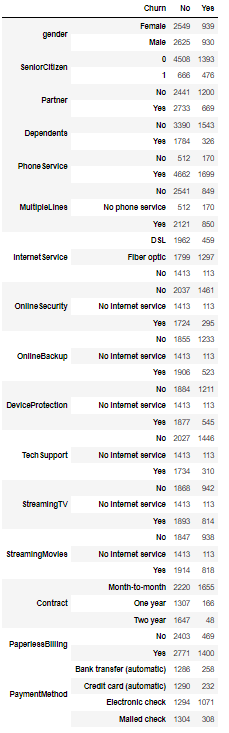

In [ ]:
# Ajouter une colonne qui contient le pourcentage dans l'ensemble de données "summary"

summary['Churn_Percentage'] = summary.apply(lambda x: round(x['Yes'] / x[['Yes', 'No']].sum() * 100, 2), axis=1)
summary

### Visualisation de données

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns 
from pylab import rcParams 

# Créer et afficher un cercle de pourcentage de clients abonnés et désabonnés
# Pour simplifier l'instruction, vous trouverez ci-dessous la sortie souhaitée

summary[['Yes', 'No']].sum().plot(kind='pie', ylabel='', colors=('red', 'lightblue'), autopct='%1.1f%%', shadow=True, explode=(0.03, 0.03), startangle=355, title='Customer Churn Breakdown', figsize=(5.8, 5.8))

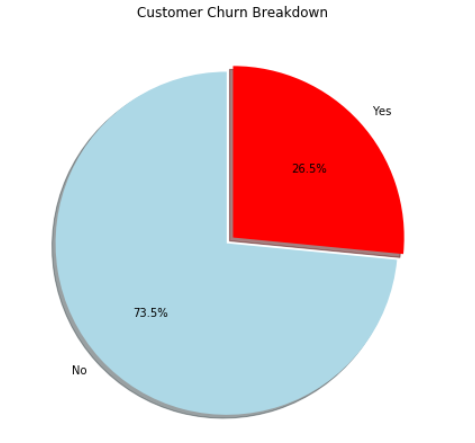

In [ ]:
# Créez un tracé de violon (Violin Plot) montrant comment les frais mensuels "MonthlyCharges" sont liés au taux de désabonnement "Churn"
# Nous constatons que les clients barattés ont tendance à être des clients mieux rémunérés

sns.violinplot(data=churn_df, y=churn_df["MonthlyCharges"], x=churn_df["Churn"])

In [ ]:
# Créez un tracé de violon (Volin Plot) montrant comment les Mandat "tenure" sont liés au taux de désabonnement "Churn"

sns.violinplot(data=churn_df, y=churn_df["tenure"], x=churn_df["Churn"])

In [ ]:
churn_df_corr = churn_df.apply(lambda x : pd.factorize(x)[0])

In [ ]:
# Créer et afficher la matrice de corrélation

plt.figure(figsize = (15, 15))

sns.heatmap(churn_df_corr.corr(), vmin=-1, vmax=1, annot=True)


# Préparer les données pour le classificateur d'apprentissage automatique

In [ ]:
# Vérifiez les champs vides " " dans la colonne 'TotalCharges': " " n'est pas Null mais un caractère espacé

print(f"""Nombres de colonnes dans 'TotalCharges' qui contiennent " ": {(churn_df['TotalCharges'] == ' ').sum()}\nNombres de colonnes dans 'TotalCharges' qui contiennent Null: {(churn_df['TotalCharges'].isna()).sum()}""")


In [ ]:
## Supprimer les données manquantes (Les espaces " " de la colonne 'TotalCharges') et vérifier la bonne suppression

churn_df.TotalCharges = churn_df.TotalCharges.replace(" ", None)

print(f"""Nombres de colonnes dans 'TotalCharges' qui contiennent " ": {(churn_df['TotalCharges'] == ' ').sum()}\nNombres de colonnes dans 'TotalCharges' qui contiennent Null: {(churn_df['TotalCharges'].isna()).sum()}""")

indexNames = churn_df[churn_df.TotalCharges.isnull()].index
churn_df.drop(indexNames , inplace=True)

print(f"""\nAprès supression des lignes où TotalCharges est manquant:\nNombres de colonnes dans 'TotalCharges' qui contiennent " ": {(churn_df['TotalCharges'] == ' ').sum()}\nNombres de colonnes dans 'TotalCharges' qui contiennent Null: {(churn_df['TotalCharges'].isna()).sum()}""")

In [ ]:
# Transformer la colonne 'TotalCharges' en type float

churn_df.TotalCharges = pd.to_numeric(churn_df.TotalCharges)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Mettez la colonne 'customerID' dans une liste appelée "Id_col"
Id_col = ['customerID']

# Mettez la colonne de sortie "Churn" dans une liste appelée target_col
target_col = ["Churn"]

# Créez une liste appelée "cat_cols" qui contient toutes les colonnes d'entrée catégorielles
cat_cols = (churn_df.drop((Id_col + target_col), axis = 1)).select_dtypes(include=['object']).keys().tolist()

# Créez une liste appelée "num_cols" qui contient toutes les colonnes d'entrée numériques
num_cols = (churn_df.drop((Id_col + target_col + cat_cols), axis = 1)).keys().tolist()

# Créez une liste appelée "bin_cols" qui contient toutes les colonnes d'entrée binaire avec seulement deux valeurs
bin_cols =  (churn_df.drop((Id_col + target_col), axis = 1)).nunique()[churn_df.nunique() == 2].keys().tolist()

# Créez une liste appelée "multi_cols" qui contient les colonnes d'entrée catégorielles avec plus de 2 valeurs
multi_cols =  (churn_df.drop((Id_col + target_col + bin_cols + num_cols), axis = 1)).keys().tolist()

# Créez un Label encoding et appliquez le aux colonnes binaires (utiliser la liste construite "bin_cols")

for col in bin_cols:
    churn_df[col] = LabelEncoder().fit_transform(churn_df[col])

# Dupliquer les colonnes qui contient les colonnes d'entrée catégorielles avec plus de 2 valeurs "multi_cols"
# Utiliser la fonction pd.get_dummies()

churn_df = pd.get_dummies(churn_df, columns = multi_cols)


In [ ]:
# Affichez les 5 premières lignes de notre dataframe et observez la différence

churn_df.head()

In [ ]:
# Afficher le nombre de colonnes de notre base de données

churn_df.shape[1]

In [ ]:
# Standardiser les colonnes numériques (Utilisez la fonction StandardScaler(), avec la liste "num_cols")

sc = StandardScaler()
churn_df[num_cols] = sc.fit_transform(churn_df[num_cols])

# Affichez les 5 premières lignes de notre dataframe et observez la différence

churn_df.head()

In [ ]:
# Supprimer les colonnes 'customerID'

churn_df.drop('customerID', axis = 1, inplace = True)

# Afficher les 5 premiéres lignes pour vérifier la bonne modification

churn_df.head()

In [ ]:
# Vérifiez s'il y a des valeurs manquantes dans notre base de données

print(f"Nombre de valeurs manquantes: {churn_df.isna().sum().sum()}")

# Modélisation

In [ ]:
from sklearn.model_selection import train_test_split

# Mettez toutes les colonnes d'entrée sauf la colonne de sortie 'Churn' dans une variable nommée 'x' 

X = churn_df.drop('Churn', axis = 1)

# Mettez la colonne de sortie 'left' dans une variable nommée 'y' 

y = LabelEncoder().fit_transform(churn_df['Churn'])

In [ ]:
# Divisez-les en un rapport Train:Test de 70:30 (X_train, X_test, y_train, y_test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
# Affichez le type de "X_train"

print(type(X_train))

In [ ]:
# Construire un data frame par "X_train", puis afficher ses 5 premières lignes

X_train.head()

In [ ]:
# Déterminer le nombre de colonnes de notre base de données

print(f"Nombre de colonnes dans X_train: {X_train.columns.value_counts().sum()}")

# Fit a Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


# Définir et entrainer une Régression logistique

logReg = LogisticRegression(solver = 'lbfgs')

logReg.fit(X_test, y_test)

y_pred = logReg.predict(X_test)

# Afficher les évaluateurs métriques (Accuracy,precision,recall,f1-score,support ) dans une "confusion matrix"

print(f"Matrice de confusion: \n{confusion_matrix(y_test, y_pred)}\n")

print(f"Precision: {round(accuracy_score(y_test, y_pred), 3) * 100}%\n")

print(classification_report(y_test, y_pred))

## Importance des fonctionnalités à l'aide de la régression logistique

In [ ]:
# Afficher les coefficients d'importance des variables d'entrée sur notre prédiction

importances = logReg.coef_[0]
colones = churn_df.drop(['Churn'], axis = 1).columns.values.tolist()

imp_df = pd.DataFrame()

imp_df['feature'] = colones
imp_df['importance'] = importances

imp_df.sort_values('importance', axis = 0, ascending = False, inplace = True)

imp_df.plot.bar(x = 'feature', y = 'importance', rot = 90)

# Forêts aléatoires (Random Forests)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Définir et entrainer une Random Forest

forest = RandomForestClassifier()

forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)

# Afficher les évaluateurs métriques (Accuracy,precision,recall,f1-score,support ) dans une "confusion matrix"

print(f"Matrice de confusion: \n{confusion_matrix(y_test, y_pred)}\n")

print(f"Precision: {round(accuracy_score(y_test, y_pred), 3) * 100}%\n")

print(classification_report(y_test, y_pred))

# Arbre de décision


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Définir et entrainer un arbre de décision

deci_tree = DecisionTreeClassifier()

deci_tree.fit(X_train, y_train)

y_pred = deci_tree.predict(X_test)

# Afficher les évaluateurs métriques (Accuracy,precision,recall,f1-score,support ) dans une "confusion matrix"

print(f"Matrice de confusion: \n{confusion_matrix(y_test, y_pred)}\n")

print(f"Precision: {round(accuracy_score(y_test, y_pred), 3) * 100}%\n")

print(classification_report(y_test, y_pred))

# SVM

In [ ]:
from sklearn.svm import SVC

# Définir et entrainer un classificateur de SVM

clf = SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Afficher les évaluateurs métriques (Accuracy,precision,recall,f1-score,support) dans une "confusion matrix"

print(f"Matrice de confusion: \n{confusion_matrix(y_test, y_pred)}\n")

print(f"Precision: {round(accuracy_score(y_test, y_pred), 3) * 100}%\n")

print(classification_report(y_test, y_pred))

# XG-boost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Définir et entrainer un classificateur de XGboost

xg_boost = GradientBoostingClassifier()
xg_boost.fit(X_train, y_train)
y_pred = xg_boost.predict(X_test)

# Afficher les évaluateurs métriques (Accuracy,precision,recall,f1-score,support) dans une "confusion matrix"

print(f"Matrice de confusion: \n{confusion_matrix(y_test, y_pred)}\n")

print(f"Precision: {round(accuracy_score(y_test, y_pred), 3) * 100}%\n")

print(classification_report(y_test, y_pred))

# Enregistrement et chargement de modèles

In [ ]:
import pickle

# Enregistrer et charger le modèle



# Try Deep Learning

In [ ]:
# Use the newest version of TensorFlow 2.0
import tensorflow as tf

tf.__version__

In [ ]:
# Check to ensure we're using our GPU
from tensorflow.python.client import device_lib

print(tf.config.list_physical_devices('GPU'))
gpu = [x.name for x in device_lib.list_local_devices() if x.device_type == 'GPU']
print(gpu)

In [ ]:
# Create a simple model
from keras.models import Sequential
from keras.layers import Dense

# Contruire un réseaux de neurones tels que :
# la couche d'entrée admet le "relu" comme fonction d'activation avec le kernel_initializer "uniform"
# La couche de sortie admet la "sigmoid" comme fonction d'activation avec le kernel_initializer "uniform"
# Le compile se fait avec ( optimizer= "adam",loss = "binary_crossentropy",metrics = ["accuracy"] )

model = Sequential()
model.add(Dense(40, activation = "relu", kernel_initializer = "uniform", name = 'entree', input_dim = 40 ))
model.add(Dense(1, activation = "sigmoid", kernel_initializer = "uniform", name = 'sortie'))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
# Afficher le résumé du modèle et afficher les paramètres

model.summary()

In [ ]:
# Entrainer le réseux de neurones, mettez le batch_size à 64 et l'epochs à 25

history = model.fit(X_train, y_train, batch_size = 64, epochs = 25)

In [ ]:
# Afficher les évaluateurs métriques (Accuracy,precision,recall,f1-score,support ) dans une "confusion matrix"

y_pred = model.predict(X_test)
y_pred = y_pred > 0.5

print(f"Matrice de confusion: \n{confusion_matrix(y_test, y_pred)}\n")

print(f"Precision: {round(accuracy_score(y_test, y_pred), 4) * 100}%\n")


print(classification_report(y_test, y_pred))

## Sauvegarder et charger nos modèles de Deep Learning

In [ ]:
# Sauvgarder le modéle


In [ ]:
# Chargez le modéle


## Essayons un modèle plus profond et apprenons à utiliser les points de contrôle et l'arrêt anticipé

In [ ]:
from keras.regularizers import l2
from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint

# Construisez un modéle de réseaux de neurones appelé "modell2" avec 3 couches cachées, la fonction d'activation des couches cachées est 'activation='relu''

model_l2 = Sequential()

model_l2.add(Dense(40, kernel_regularizer = l2(), activation = "relu", input_shape = (40,)))
model_l2.add(Dropout(0.2))

model_l2.add(Dense(40, kernel_regularizer = l2(), activation = "relu"))
model_l2.add(Dropout(0.2))

model_l2.add(Dense(40, kernel_regularizer = l2(), activation = "relu"))
model_l2.add(Dropout(0.2))

model_l2.add(Dense(1, kernel_regularizer = l2(), activation = "sigmoid"))

# Créez notre point de contrôle "Checkpoint" afin que nous sauvegardions chaque modèle après chaque époque

filepath = "mnist_data_checkpoint"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
print(model_l2)
print(callbacks_list)

In [ ]:
# Compilez "le model12", La compilation se fait avec ( optimizer= "adam",loss = "binary_crossentropy",metrics = ["accuracy"] )

model_l2.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
model_l2.summary()

In [ ]:
from keras.callbacks import EarlyStopping 

# Définir des critères d'arrêt anticipé :
# monitor = 'val_loss' : valeur faisant l'objet d'un suivi d'amélioration
# min_delta = 0 : Valeur abs et est le changement minimum requis avant que nous nous arrêtions
# patience = 2 : Nombre d'époques que nous attendons avant de nous arrêter
# verbose = 1 
# restore_best_weights = True : garde les meilleurs poids une fois à l'arrêt


# Mettez les critères d'arrêt anticipé dans une liste

callback = EarlyStopping(monitor = "val_loss", min_delta = 0, patience = 2, verbose = 1, restore_best_weights = True)

In [ ]:
# Entrainer le réseux de neurones, mettez le batch_size à 32 et l'epochs à 10

history = model_l2.fit(X_train, y_train, batch_size = 32, epochs = 10, callbacks = [callback])

In [ ]:
y_pred = model_l2.predict(X_test)
y_pred = y_pred > 0.5

print(f"Matrice de confusion: \n{confusion_matrix(y_test, y_pred)}\n")

print(f"Precision: {round(accuracy_score(y_test, y_pred), 4) * 100}%\n")

print(classification_report(y_test, y_pred))

In [ ]:
display(plt.plot(history.history['loss']))

In [ ]:
display(plt.plot(history.history['accuracy']))